In [ ]:
See final results at the end.

# Hyper parameter optimization
Use Grid search to find best parameters for models. Use full dataset to train final models.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plots_fabi import *
import pickle
import sys
# Add functions path
sys.path.append('../Functions')
from time import time

### Load Dataset

In [2]:
from datasets import load_stratified_dataset
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train.csv', labels='category', samples_per_label=1000, random_seed=11)

In [3]:
# TfidfVectorizer generates bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_tf: use logarithmic form for frequency
# min_df: minimum numbers of documents a word must be present to keep it
# ngram_range: number of ngrams to use
# stopwords: remove all common pronouns in given language

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1',
                        ngram_range=(1, 3), stop_words='english', max_features=40000)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_test = train_test_split(df['text_lem'], df['category'], random_state = 42)

X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

***
# GridSearch
Search for best hyperparameters.

In [5]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
"""
parameters = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': np.logspace(-1,1,10), 'multi_class': ['auto', 'ovr', 'multinomial']}
clf = GridSearchCV(LogisticRegression(max_iter = 10000, random_state=42), parameters, n_jobs=4, cv=5)
clf.fit(X_train_tfidf, y_train)
print(clf.score(X_train_tfidf, y_train), clf.score(X_val_tfidf, y_val))
clf.best_params_
"""
print("'C': 5.994842503189409, 'multi_class': 'auto', 'penalty': 'l2'")

'C': 5.994842503189409, 'multi_class': 'auto', 'penalty': 'l2'


In [8]:
"""
parameters = {'penalty': ['l2'], 'C': np.linspace(5, 7, 10)}
clf = GridSearchCV(LogisticRegression(max_iter = 10000, random_state=42), parameters, n_jobs=4, cv=5)
clf.fit(X_train_tfidf, y_train)
print(clf.score(X_train_tfidf, y_train), clf.score(X_val_tfidf, y_val))
clf.best_params_
"""
print("'C': 5.222222222222222, 'penalty': 'l2'")
print("Result: Train: 0.99, Val: 0.75")

'C': 5.222222222222222, 'penalty': 'l2'
Result: Train: 0.99, Test: 0.75


### LinearSVC

In [9]:
from sklearn.svm import LinearSVC

In [10]:
"""
parameters = {'penalty': ['l1', 'l2'], 'C': np.logspace(-1,1,10), 'dual': [False, True], 'loss': ['hinge', 'squared_hinge']}
clf = GridSearchCV(LinearSVC(max_iter = 10000, random_state=42), parameters, n_jobs=4, cv=5)
clf.fit(X_train_tfidf, y_train)
print(clf.score(X_train_tfidf, y_train), clf.score(X_val_tfidf, y_val))
clf.best_params_
"""
print("'C': 0.16681005372000587, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l2'")

'C': 0.16681005372000587, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l2'


In [11]:
parameters = {'penalty': ['l2'], 'C': np.linspace(0.1, 0.2, 5), 'dual': [False], 'loss': ['squared_hinge']}
clf = GridSearchCV(LinearSVC(max_iter = 10000, random_state=42), parameters, n_jobs=4, cv=5)
clf.fit(X_train_tfidf, y_train)
print(clf.score(X_train_tfidf, y_train), clf.score(X_val_tfidf, y_val))
clf.best_params_

0.9167619047619048 0.7531428571428571


{'C': 0.17500000000000002,
 'dual': False,
 'loss': 'squared_hinge',
 'penalty': 'l2'}

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
"""
parameters = {'n_estimators': [100, 400, 700, 1000], 'criterion': ['gini','entropy'], 'max_depth': [None, 10, 30, 50, 80], 'min_samples_split': [2, 6, 10, 15]}
clf = GridSearchCV(RandomForestClassifier(random_state=42), parameters, n_jobs=4, cv=5)
clf.fit(X_train_tfidf, y_train)
print(clf.score(X_train_tfidf, y_train), clf.score(X_val_tfidf, y_val))
clf.best_params_
"""
print("'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 1000")
print("Result: Train: 0.99, Val: 0.71")

'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 1000
Result: Train: 0.99, Test: 0.71


In [14]:
"""
parameters = {'n_estimators': [1000, 1300, 1500], 'criterion': ['gini'], 'max_depth': [None], 'min_samples_split': [2]}
clf = GridSearchCV(RandomForestClassifier(random_state=42), parameters, n_jobs=4, cv=5)
clf.fit(X_train_tfidf, y_train)
print(clf.score(X_train_tfidf, y_train), clf.score(X_val_tfidf, y_val))
clf.best_params_
"""
print("'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 1300")
print("Result: Train: 0.99, Val: 0.71")

'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 1300
Result: Train: 0.99, Test: 0.71


***
For __all models__ grid search does __not__ really seem to __improve__ accuracy. Probably since errors occur due to the dataset given.

***
## Full data optimization with balanced data set

In [15]:
df_train = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train.csv', labels='category', samples_per_label=99000, random_seed=42)
df_test = pd.read_csv('../Datasets/dataset_categories/dataset_categories_test.csv')
df_train.shape, df_test.shape

Smallest sample size in dataset is 12026 samples!


((84181, 8), (3500, 8))

In [16]:
from sklearn.model_selection import train_test_split

X_train = df_train.text_lem
X_test = df_test.text_lem
y_train = df_train.category
y_test = df_test.category

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#### Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
print('Training accuracy: {:.2f}%;  Test accuracy: {:.2f}%'.format(nb.score(X_train_tfidf, y_train)*100, nb.score(X_test_tfidf, y_test)*100))

Training accuracy: 74.60%;  Test accuracy: 73.00%


#### Logistic Regression

In [18]:
lr = LogisticRegression(max_iter=10000, random_state=42, C=5.2, multi_class= 'ovr', penalty='l2')
lr.fit(X_train_tfidf, y_train)
print('Training accuracy: {:.2f}%;  Test accuracy: {:.2f}%'.format(lr.score(X_train_tfidf, y_train)*100, lr.score(X_test_tfidf, y_test)*100))

Training accuracy: 91.91%;  Test accuracy: 80.97%


#### LinearSVC

In [19]:
svc = LinearSVC(max_iter=10000, random_state=42, C=0.16, dual=False, loss='squared_hinge', penalty='l2')
svc.fit(X_train_tfidf, y_train)
print('Training accuracy: {:.2f}%;  Test accuracy: {:.2f}%'.format(svc.score(X_train_tfidf, y_train)*100, svc.score(X_test_tfidf, y_test)*100))

Training accuracy: 87.31%;  Test accuracy: 80.23%


#### Random Forest

In [20]:
"""
rf = RandomForestClassifier(random_state=42, criterion='gini', max_depth=None, min_samples_split=2, n_estimators= 1300)
rf.fit(X_train_tfidf, y_train)
print('Training accuracy: {:.2f}%;  Test accuracy: {:.2f}%'.format(rf.score(X_train_tfidf, y_train)*100, rf.score(X_test_tfidf, y_test)*100))
"""
print('Train accuracy: 99.92%;  Test accuracy: 76.73%')

Train accuracy: 99.92%;  Test accuracy: 76.73%


## Ensemble

In [21]:
from sklearn.ensemble import VotingClassifier
voter = VotingClassifier(estimators=[('lr', lr), ('svc', svc), ('nb', nb)], voting='hard')

In [22]:
voter.fit(X_train_tfidf, y_train);

In [23]:
print('Training accuracy: {:.2f}%;  Test accuracy: {:.2f}%'.format(voter.score(X_train_tfidf, y_train)*100, voter.score(X_test_tfidf, y_test)*100))

Training accuracy: 87.86%;  Test accuracy: 80.20%


***
## Full data optimization with unbalanced data set

In [24]:
df_train = pd.read_csv('../Datasets/dataset_categories/dataset_categories_train.csv')
df_test = pd.read_csv('../Datasets/dataset_categories/dataset_categories_test.csv')
df_train.shape, df_test.shape

((128873, 8), (3500, 8))

In [25]:
# Sample weights for training
cat_weight = 1/df_train.category.value_counts()*df_train.category.value_counts()[0]
sample_weight = [cat_weight[i] for i in df_train.category]
cat_weight

technology       1.000000
entertainment    1.000000
world            1.000103
travel           1.000205
financial        1.000205
sports           1.007076
politics         1.621404
Name: category, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

X_train = df_train.text_lem
y_train = df_train.category
X_test = df_test.text_lem
y_test = df_test.category

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#### Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train, sample_weight=sample_weight)
print('Training accuracy: {:.2f}%;  Test accuracy: {:.2f}%'.format(nb.score(X_train_tfidf, y_train)*100, nb.score(X_test_tfidf, y_test)*100))

Training accuracy: 74.98%;  Test accuracy: 72.97%


#### Logistic Regression

In [28]:
lr = LogisticRegression(max_iter=10000, random_state=42, C=5.2, multi_class= 'ovr', penalty='l2')
lr.fit(X_train_tfidf, y_train, sample_weight=sample_weight)
print('Training accuracy: {:.2f}%;  Test accuracy: {:.2f}%'.format(lr.score(X_train_tfidf, y_train)*100, lr.score(X_test_tfidf, y_test)*100))

Training accuracy: 91.44%;  Test accuracy: 81.60%


#### LinearSVC

In [29]:
svc = LinearSVC(max_iter=10000, random_state=42, C=0.16, dual=False, loss='squared_hinge', penalty='l2')
svc.fit(X_train_tfidf, y_train, sample_weight = sample_weight)
print('Training accuracy: {:.2f}%;  Test accuracy: {:.2f}%'.format(svc.score(X_train_tfidf, y_train)*100, svc.score(X_test_tfidf, y_test)*100))

Training accuracy: 87.60%;  Test accuracy: 81.11%


***
## Take full tfidf

In [30]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1',
                        ngram_range=(1, 3), stop_words='english', max_features=None)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#### Logistic Regression

In [31]:
lr = LogisticRegression(max_iter=10000, random_state=42, C=5.2, multi_class= 'ovr', penalty='l2')
lr.fit(X_train_tfidf, y_train, sample_weight=sample_weight)
print('Training accuracy: {:.2f}%;  Test accuracy: {:.2f}%'.format(lr.score(X_train_tfidf, y_train)*100, lr.score(X_test_tfidf, y_test)*100))

Training accuracy: 95.78%;  Test accuracy: 81.71%


#### Linear SVC

In [32]:
svc = LinearSVC(max_iter=10000, random_state=42, C=0.46, dual=False, loss='squared_hinge', penalty='l2')
svc.fit(X_train_tfidf, y_train, sample_weight = sample_weight)
print('Training accuracy: {:.2f}%;  Test accuracy: {:.2f}%'.format(svc.score(X_train_tfidf, y_train)*100, svc.score(X_test_tfidf, y_test)*100))

Training accuracy: 96.44%;  Test accuracy: 82.37%


***
## Save final model
Save final model to use it on streamlit. Save the tfidf vectorizer and the svc model as pkl files. Write a class to load both models and use them to categorize final text.

__Take smaller model__ since taking all features in only brings slight improvement.

In [34]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1',
                        ngram_range=(1, 3), stop_words='english', max_features=40000)

In [35]:
df_train = pd.read_csv('../Datasets/dataset_categories/dataset_categories_train.csv')
print('# Observations in train set: {}'.format(df_train.shape[0]))

# Observations in train set: 128873


In [36]:
X_train = df_train.text_lem
y_train = df_train.category

X_train_tfidf = tfidf.fit_transform(X_train)

In [37]:
# Sample weights for training
cat_weight = 1/df_train.category.value_counts()*df_train.category.value_counts()[0]
sample_weight = [cat_weight[i] for i in df_train.category]
cat_weight

technology       1.000000
entertainment    1.000000
world            1.000103
travel           1.000205
financial        1.000205
sports           1.007076
politics         1.621404
Name: category, dtype: float64

In [38]:
#svc = LinearSVC(max_iter=10000, random_state=42, C=0.16, dual=False, loss='squared_hinge', penalty='l2')
#svc.fit(X_train_tfidf, y_train)
#print('Training accuracy: {:.2f}%'.format(svc.score(X_train_tfidf, y_train)*100))
lr = LogisticRegression(max_iter=10000, random_state=42, C=5.2, multi_class= 'ovr', penalty='l2')
lr.fit(X_train_tfidf, y_train, sample_weight=sample_weight)
print('Training accuracy: {:.2f}%'.format(lr.score(X_train_tfidf, y_train)*100))

Training accuracy: 91.44%


In [39]:
df_test = pd.read_csv('../Datasets/dataset_categories/dataset_categories_test.csv')
X_test = df_test.text_lem
y_test = df_test.category

X_test_tfidf = tfidf.transform(X_test)

In [40]:
#print('Test accuracy: {:.2f}%'.format(svc.score(X_test_tfidf, y_test)*100))
print('Test accuracy: {:.2f}%'.format(lr.score(X_test_tfidf, y_test)*100))

Test accuracy: 81.60%


In [41]:
# Delete stop words to reduce size of file, they are not needed for prediction
delattr(tfidf, 'stop_words_')
clf = lr

In [42]:
pickle.dump(tfidf, open("tfidf_categorizer.pkl", "wb"), protocol=pickle.HIGHEST_PROTOCOL)

In [43]:
!du -sh tfidf_categorizer.pkl

2.1M	tfidf_categorizer.pkl


In [44]:
pickle.dump(clf, open("clf_categorizer.pkl", "wb"), protocol=pickle.HIGHEST_PROTOCOL)

In [45]:
!du -sh clf_categorizer.pkl

2.1M	clf_categorizer.pkl


In [46]:
# Test class
from categorizer import Categorizer

categorizer = Categorizer()
pred = categorizer.pred(X_test)
(pred == y_test).sum()/y_test.shape[0]

0.816

Final accuracy is correct, loading and using model works fine.

***
# Final Results
Visualize final results

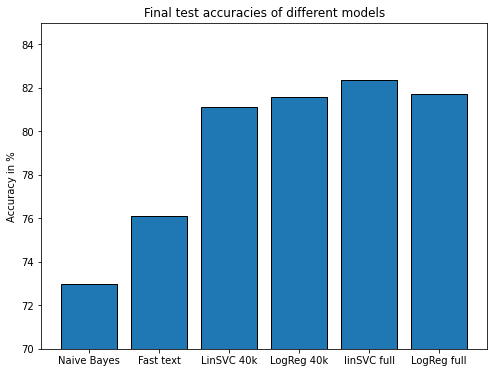

In [2]:
x = ['Naive Bayes', 'Fast text', 'LinSVC 40k', 'LogReg 40k', 'linSVC full', 'LogReg full']
y = [73, 76.1, 81.11,81.6, 82.37, 81.71]

fig, ax = plt.subplots(figsize=(8,6))
plt.bar(x,y, edgecolor='black')
plt.ylim(70,85)
plt.ylabel('Accuracy in %')
plt.title('Final test accuracies of different models')
plt.savefig('results.png')

Here we see the final results for our models on the test dataset. If we take the Naive Bayes as our Base model, we see that the Fast text categorization already improves the result by about 4%. With Logistic Regression and Linear SVC we were able to improve our Accuracy to about 82%. The best final model is the linear SVC, but you have to take into account about 900k feature words to achieve this accuracy. If we reduce the feature size to 40k, we still achieve an accuracy of almost 82% with logistic Regression, that's why we will use this cheaper method instead.